# Final Project: Music Genre Clustering

In [1]:
# the following packages can be used to extract features from audio data
# from pyAudioAnalysis import audioBasicIO 
# from pyAudioAnalysis import ShortTermFeatures
# import librosa # https://librosa.org/doc/main/feature.html
# you may use other packages too.

import numpy as np
import scipy

import os

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from pyAudioAnalysis import MidTermFeatures

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import sklearn.metrics.pairwise as pw

%matplotlib inline

Please do a clustering analysis on the provided sound tracks. You may use any methods for feature engineering, but the clustering methods should be limited to the methods discussed in this class. Do not hand label the tracks (it will be considered as cheating).

In [2]:
# feature extraction

#features,songs,feature_names=MidTermFeatures.directory_feature_extraction("./data/", 
#                                                                          mid_window=1, 
#                                                                          mid_step=1,
#                                                                          short_window=0.1, 
#                                                                          short_step=0.05)

In [3]:
# alternatively read features from precomputed feature array

features = np.load("features.npy")

In [4]:
# scale features

scaler = StandardScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)

In [5]:
# construct cosine similarity matrix

pws = pw.cosine_similarity(scaled_features)

Text(0, 0.5, 'component 2')

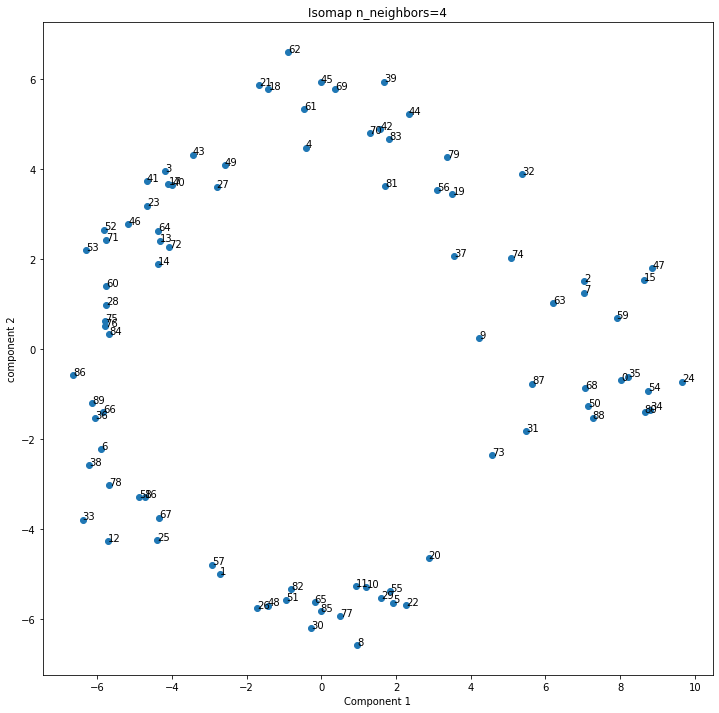

In [6]:
# perform Isomap on our dataset to obtain lower dimension manifold we can visualize

embedding = Isomap(n_components=2, n_neighbors=4)
x_new = embedding.fit_transform(pws)

fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1])

for i in range(90):
    ax.annotate(i, (x_new[i,0],x_new[i,1]))
    
ax.set_title("Isomap n_neighbors=4")
ax.set_xlabel("Component 1")
ax.set_ylabel("component 2")

Text(0, 0.5, 'component 2')

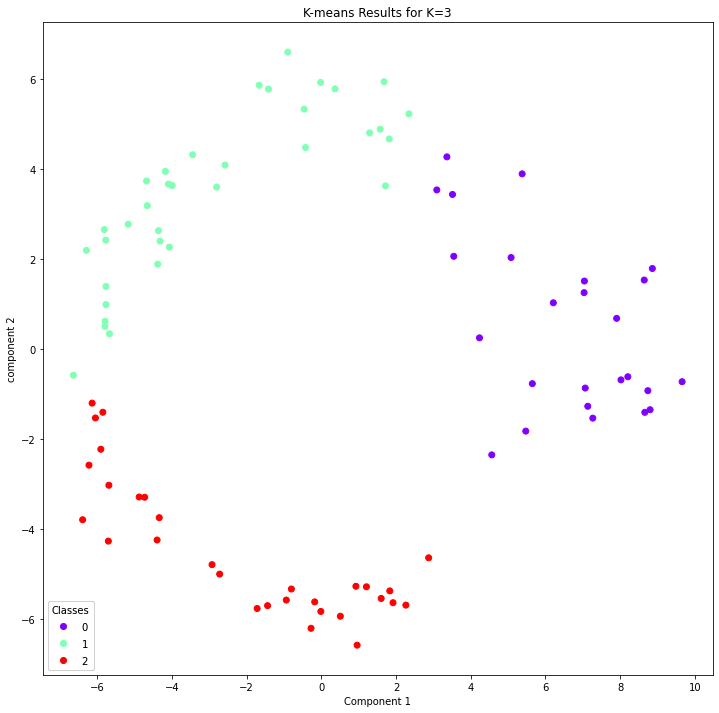

In [7]:
# use k-means with k=3 on our manifold

clustering = KMeans(n_clusters=3,random_state=0).fit(x_new)
clust_labs = clustering.labels_
fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1], c=clust_labs, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

ax.set_title("K-means Results for K=3")
ax.set_xlabel("Component 1")
ax.set_ylabel("component 2")

In [8]:
# calculate the silhouette score

sample_silhouette_values = silhouette_samples(x_new, clust_labs)
silhouette_avg = silhouette_score(x_new, clust_labs)
silhouette_avg

0.5064992461777256

Text(0.5, 0.98, 'Standardized Data -> Cosine Similarity Matrix -> ISOMAP -> KMeans')

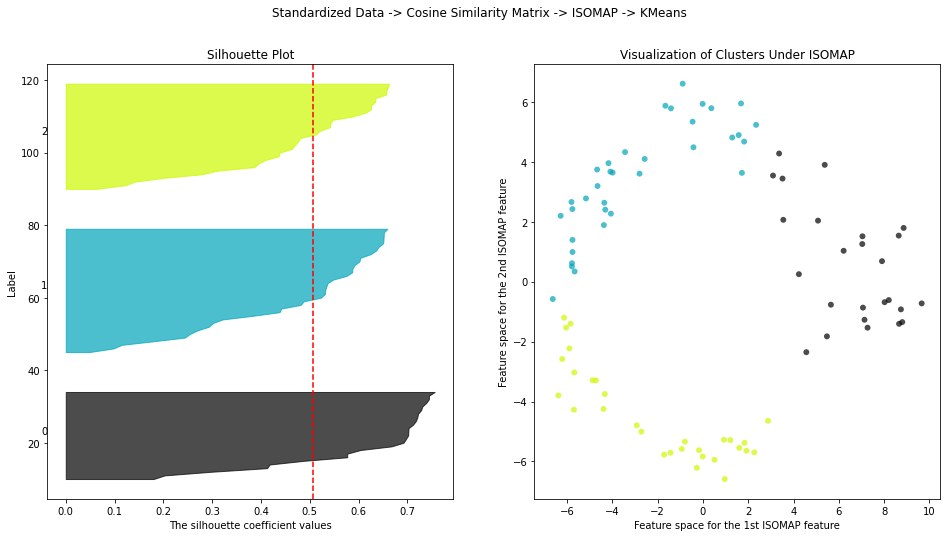

In [9]:
# visualize silhouette and clusters to determine if clusters perform approprately

n_clusters = 3
y_lower = 10

fig, ax = plt.subplots(1, 2, figsize = (16, 8))

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[clust_labs == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax[0].fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10
    
ax[0].axvline(x=silhouette_avg, color="red", linestyle="--")

colors=cm.nipy_spectral(clust_labs.astype(float)/n_clusters)
ax[1].scatter(x_new[:,0],x_new[:,1], marker='.', s=140, lw=0, alpha=0.7,c=colors, edgecolor='k')

ax[0].set_title("Silhouette Plot")
ax[0].set_xlabel("The silhouette coefficient values")
ax[0].set_ylabel("Label")
    
ax[1].set_title("Visualization of Clusters Under ISOMAP")
ax[1].set_xlabel("Feature space for the 1st ISOMAP feature")
ax[1].set_ylabel("Feature space for the 2nd ISOMAP feature")

plt.suptitle("Standardized Data -> Cosine Similarity Matrix -> ISOMAP -> KMeans")

In [10]:
# function to reorder clustering results in numerical order

def fix_order(labs):
    for i in range(2,10):
        temp = labs[(i-1)*10+i]
        labs.pop((i-1)*10+i)
        labs.insert(i, temp)
    return labs

In [11]:
# reorder resulting clustering labels

reordered_labs = clust_labs.tolist()
reordered_labs = fix_order(reordered_labs)

# Submission to leaderboard

You will get feedback of your clustering result by submitting to the leaderboard. Each team will have 10 chances. Please submit a submission log as an appendix in your final report, which should record your ari score (leadboard feedback), and your improvement plan (in bullet points, keep it concise) between two submissions.

There are two types of submissions.

### Stage Submission

Each group can submit your results up to ten times. You will only get the range of your ari scores to have a rough check of your clusters. This is by no means a supervised learning project. So your goal shouldn't be to improve this ari score. It only serves as an indicator whether you need to work harder to improve your clustering scheme.

### Final Submission

You can only run the final submission once! It is when you finished all the writing and everything is finalized. Change isFinal = 'yes' then run this cell. You must keep the succesfull message from the server when you submit your jupyter notebook. Once you made the final submission, the server will not accept any further submission of any kind.

In [11]:
labels = list(range(90)) 
vsID = ""  
URL = ""
isFinal = 'no'

# 1. put your clustering result in labels;
#  if you have k clusters, the labels should be a vector of elements taking values
#  from 0~ k-1, there must not have a cluster with no members.
# 2. put your group ID as a string in vsID, it is unique for each group
# 3. change the URL to the URL that will be published on Canvas.
# 4. To make your final submission, change isFinal to 'yes'

### Do not change any code except the following block
### your code starts here

labels = reordered_labs
vsID = "10730143x"
URL = "https://wfirmplh0g.execute-api.us-west-1.amazonaws.com/leaderboard/ari"
isFinal = 'yes'

### your code ends here


import requests
import json
submission = {}
submission['vsID'] = vsID
submission['labels'] = ",".join( [ str( int(x)) for x in labels   ])
submission['isFinal'] = isFinal
r = requests.get(url = URL, params = submission)

print(r.json()['body'])

"Group 7 :Submission sucessful! ARI score is 57.981254964257346. Do not change anything starting from this point! "


# <font color= "blue"> Submission Instructions</font>

1. Change the isFinal variable to be 'yes' in the submission to leaderboard cell, run it just once to get submission sucessful message.
2. Select File -> Download as -> PDF via LaTeX
3. Submit your PDF on Gradescope. There should be three different parts to submit on gradescope, the report pdf file, jupyter notebook pdf file and the methodology pdf file.
4. Pack all the relevant files (you can save your features in a different file, feature.csv) into a zipfile yourGroupNumber.zip (group1.zip for example) and upload it to Canvas.